In [6]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
from tensorflow.keras import mixed_precision
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator



# Create separate ImageDataGenerator instances for training and validation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    zoom_range=0.2,
    horizontal_flip=True
)

val_datagen = ImageDataGenerator(rescale=1./255)

# Load train data
train_generator = train_datagen.flow_from_directory(
    r'E:\Train',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

# Load validation data
val_generator = val_datagen.flow_from_directory(
    r'E:\Valid',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

# Check assigned class labels
print("Class Labels:", train_generator.class_indices)


Found 15280 images belonging to 8 classes.
Found 3820 images belonging to 8 classes.
Class Labels: {'Pepper_bell___Bacterial_spot': 0, 'Pepper_bell___healthy': 1, 'Potato___Early_blight': 2, 'Potato___Late_blight': 3, 'Potato___healthy': 4, 'Tomato___Tomato_Yellow_Leaf_Curl_Virus': 5, 'Tomato___Tomato_mosaic_virus': 6, 'Tomato___healthy': 7}


In [8]:
from tensorflow.keras import layers, models
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(8, activation='softmax')  # Change this to 8 for 8 classes
])


model.compile(
    loss='categorical_crossentropy',  # Since we have multiple categories
    optimizer='adam',
    metrics=['accuracy']
)

model.summary()


C:\Users\sujal\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 86528)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │      44,302,848 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 8)                   │           4,104 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 44,400,200 (169.37 MB)

 Trainable params: 44,400,200 (169.37 MB)

 Non-trainable params: 0 (0.00 B)

In [9]:
history = model.fit(train_generator, epochs=5, validation_data=val_generator)

C:\Users\sujal\AppData\Roaming\Python\Python311\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
478/478 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.5814 - loss: 1.3373   

C:\Users\sujal\AppData\Roaming\Python\Python311\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


478/478 ━━━━━━━━━━━━━━━━━━━━ 1145s 2s/step - accuracy: 0.5818 - loss: 1.3360 - val_accuracy: 0.8432 - val_loss: 0.5399
Epoch 2/5
478/478 ━━━━━━━━━━━━━━━━━━━━ 885s 2s/step - accuracy: 0.9096 - loss: 0.2640 - val_accuracy: 0.8819 - val_loss: 0.4047
Epoch 3/5
478/478 ━━━━━━━━━━━━━━━━━━━━ 868s 2s/step - accuracy: 0.9454 - loss: 0.1567 - val_accuracy: 0.8332 - val_loss: 0.7129
Epoch 4/5
478/478 ━━━━━━━━━━━━━━━━━━━━ 834s 2s/step - accuracy: 0.9616 - loss: 0.1136 - val_accuracy: 0.8840 - val_loss: 0.4811
Epoch 5/5
478/478 ━━━━━━━━━━━━━━━━━━━━ 833s 2s/step - accuracy: 0.9657 - loss: 0.1053 - val_accuracy: 0.8882 - val_loss: 0.3862


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step
Predicted class index: 7


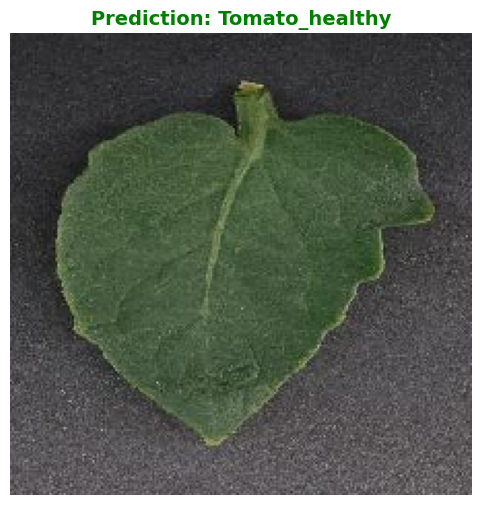

In [6]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

def load_and_preprocess_image(img_path, target_size=(224, 224)):
    try:
        # Load image and resize
        img = image.load_img(img_path, target_size=target_size)
    except Exception as e:
        raise ValueError(f"Error loading image from path {img_path}: {e}")

    # Convert to array and normalize pixel values to [0, 1]
    img_array = image.img_to_array(img) / 255.0
    # Expand dimensions to simulate a batch (batch size = 1)
    image_array = np.expand_dims(img_array, axis=0)
    
    return img, image_array
model = tf.keras.models.load_model("plant_disease_modelfinal2.h5")

def predict_image_class(model, image_array, class_mapping):
    prediction = model.predict(image_array)
    predicted_index = np.argmax(prediction)
    predicted_label = class_mapping.get(predicted_index, "Unknown")
    return predicted_index, predicted_label

def display_image_with_prediction(img, predicted_label):

    plt.figure(figsize=(6, 6))
    plt.imshow(img)
    plt.axis("off")
    plt.title(f"Prediction: {predicted_label}", fontsize=14, fontweight="bold", color="green")
    plt.show()

if __name__ == "__main__":
    # Define the image path (adjust as needed)
    img_path = r"E:\archive\test\test\TomatoHealthy2.JPG"

    # Define your class mapping exactly as specified
    class_mapping = {
        0: 'Pepper__bell___Bacterial_spot',
        1: 'Pepper__bell___healthy',
        2: 'Potato___Early_blight',
        3: 'Potato___Late_blight',
        4: 'Potato___healthy',
        5: 'Tomato__Tomato_YellowLeaf__Curl_Virus',
        6: 'Tomato__Tomato_mosaic_virus',
        7: 'Tomato_healthy'
    }

    # Load and preprocess the image
    img, image_array = load_and_preprocess_image(img_path)

    # Make sure that your model variable is defined and loaded (trained)
    predicted_index, predicted_label = predict_image_class(model, image_array, class_mapping)
    print(f"Predicted class index: {predicted_index}")
    
    # Display the image with the prediction label
    display_image_with_prediction(img, predicted_label)


In [5]:
# Plot training history
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()


NameError: name 'history' is not defined

In [ ]:
print(train_generator.class_indices)  # Check the assigned labels
print(train_generator.labels)  # Count instances per class


In [32]:
model.save("plant_disease_modelfinal2.h5")  # Saves the entire model


In [10]:
import pickle

# Training the model and saving the history object
# Save the history object
with open('training_history.pkl', 'wb') as f:
    pickle.dump(history.history, f)


<Figure size 1200x500 with 0 Axes>

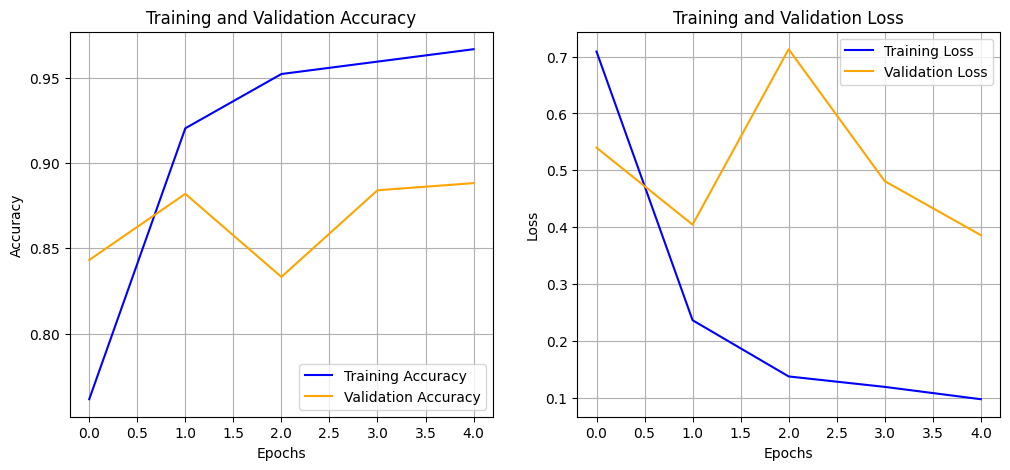

In [13]:
plt.figure(figsize=(12, 5))

# Plot Accuracy and Loss graphs
plt.figure(figsize=(12, 5))

# Plot Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='orange')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

# Save the plots
plt.savefig('accuracy_loss_plot.png', dpi=300)
plt.show()


In [14]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import numpy as np

# Assuming you have test data in 'test_generator'
test_loss, test_accuracy = model.evaluate(test_generator)
y_true = test_generator.classes  # Actual labels
y_pred = np.argmax(model.predict(test_generator), axis=1)  # Predicted labels

# Confusion Matrix
conf_matrix = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.savefig('confusion_matrix.png', dpi=300)
plt.show()

# Classification Report
class_report = classification_report(y_true, y_pred, target_names=test_generator.class_indices.keys())
print(class_report)


NameError: name 'test_generator' is not defined

In [27]:
from tensorflow.keras.utils import plot_model

In [33]:
# Assuming you used a Learning Rate Scheduler during training
if 'lr' in history.history:
    import matplotlib.pyplot as plt

    plt.figure(figsize=(8, 6))
    plt.plot(history.history['lr'], label='Learning Rate')
    plt.title('Learning Rate Over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Learning Rate')
    plt.legend()
    plt.grid(True)
    plt.savefig('learning_rate_plot.png', dpi=300)
    plt.show()


In [35]:
# Print the model summary to a text file using UTF-8 encoding
with open('model_summary.txt', 'w', encoding='utf-8') as f:
    model.summary(print_fn=lambda x: f.write(x + '\n'))


Processing: C:\Users\sujal\Documents\train\Pepper__bell___healthy\healthy_19.JPG


C:\Users\sujal\AppData\Roaming\Python\Python311\site-packages\keras\src\models\functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_100']
Received: inputs=Tensor(shape=(1, 224, 224, 3))
  warnings.warn(msg)


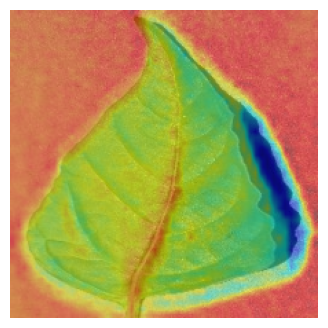

Processing: C:\Users\sujal\Documents\train\Tomato__Tomato_mosaic_virus\Tomato__Tomato_mosaic_virus_20.JPG


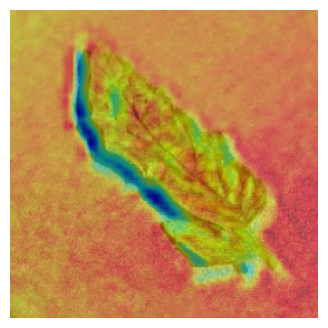

Processing: C:\Users\sujal\Documents\train\Tomato__Tomato_YellowLeaf__Curl_Virus\Tomato__Tomato_YellowLeaf__Curl_Virus_6.JPG


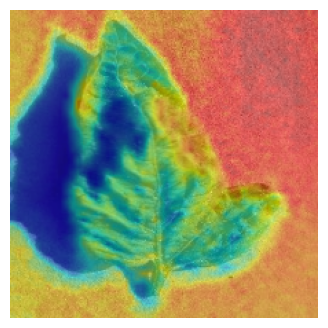

In [11]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
import cv2
import matplotlib.pyplot as plt

# Step 1: Define Model Properly with Input Layer
input_layer = tf.keras.Input(shape=(224, 224, 3))  # Explicit input definition
x = layers.Conv2D(32, (3, 3), activation='relu', name="conv2d_1")(input_layer)
x = layers.MaxPooling2D(2, 2, name="max_pooling2d_1")(x)
x = layers.Conv2D(64, (3, 3), activation='relu', name="conv2d_2")(x)
x = layers.MaxPooling2D(2, 2, name="max_pooling2d_2")(x)
x = layers.Conv2D(128, (3, 3), activation='relu', name="conv2d_3")(x)  # Last Conv Layer
x = layers.MaxPooling2D(2, 2, name="max_pooling2d_3")(x)
x = layers.Flatten(name="flatten_1")(x)
x = layers.Dense(512, activation='relu', name="dense_1")(x)
output_layer = layers.Dense(8, activation='softmax', name="output_layer")(x)  # 8 Classes

# Create the model
model = models.Model(inputs=input_layer, outputs=output_layer)

# Step 2: Compile Model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Step 3: Ensure Model is Initialized by calling it with a dummy input
dummy_input = np.random.rand(1, 224, 224, 3).astype(np.float32)
_ = model(dummy_input)  # Forces model initialization

# Step 4: Preprocess Image Function
def preprocess_image(img_path, img_size=(224, 224)):
    img = cv2.imread(img_path)
    img = cv2.resize(img, img_size)
    img = img.astype("float32") / 255.0
    img = np.expand_dims(img, axis=0)  # Add batch dimension
    return img

# Step 5: Generate Grad-CAM
def generate_gradcam(img_path, model, last_conv_layer_name):
    img_array = preprocess_image(img_path)

    # Create model that maps inputs to activations of last conv layer + predictions
    grad_model = tf.keras.models.Model(
        inputs=[model.input],
        outputs=[model.get_layer(last_conv_layer_name).output, model.output]
    )

    # Compute gradients
    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(img_array)
        class_idx = np.argmax(predictions[0])  # Get predicted class index
        loss = predictions[:, class_idx]

    grads = tape.gradient(loss, conv_outputs)
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    # Multiply feature maps by importance of each channel
    conv_outputs = conv_outputs[0]
    heatmap = tf.reduce_mean(tf.multiply(pooled_grads, conv_outputs), axis=-1)

    # Normalize the heatmap
    heatmap = np.maximum(heatmap, 0) / np.max(heatmap)
    return heatmap

# Step 6: Overlay Heatmap on Original Image
def overlay_heatmap(img_path, heatmap, alpha=0.5):
    img = cv2.imread(img_path)
    img = cv2.resize(img, (224, 224))
    
    heatmap = cv2.resize(heatmap, (224, 224))
    heatmap = np.uint8(255 * heatmap)  # Convert to RGB scale
    
    # Apply heatmap
    heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
    superimposed_img = cv2.addWeighted(img, alpha, heatmap, 1 - alpha, 0)
    
    # Display image
    plt.figure(figsize=(4, 4))
    plt.imshow(cv2.cvtColor(superimposed_img, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()
    
    return superimposed_img

# Step 7: Run Grad-CAM
image_paths = [
    r"C:\Users\sujal\Documents\train\Pepper__bell___healthy\healthy_19.JPG",
    r"C:\Users\sujal\Documents\train\Tomato__Tomato_mosaic_virus\Tomato__Tomato_mosaic_virus_20.JPG",
    r"C:\Users\sujal\Documents\train\Tomato__Tomato_YellowLeaf__Curl_Virus\Tomato__Tomato_YellowLeaf__Curl_Virus_6.JPG"
]

# Loop through each image and apply Grad-CAM
for img_path in image_paths:
    print(f"Processing: {img_path}")
    heatmap = generate_gradcam(img_path, model, last_conv_layer_name="conv2d_3")
    _ = overlay_heatmap(img_path, heatmap)


In [16]:
for layer in model.layers:
    print(layer.name)


conv2d_3
max_pooling2d_3
conv2d_4
max_pooling2d_4
conv2d_5
max_pooling2d_5
flatten_1
dense_2
dense_3
